In [72]:
# Import data
import pandas as pd
stock_data = pd.read_csv('./NFLX.csv',index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,345.950012,351.899994,341.019989,342.880005,342.880005,7709500
2020-01-28,345.880005,352.399994,342.779999,348.519989,348.519989,6821600
2020-01-29,349.000000,349.399994,338.549988,343.160004,343.160004,7643500
2020-01-30,341.100006,348.200012,339.250000,347.739990,347.739990,5328100
2020-01-31,347.390015,347.390015,340.980011,345.089996,345.089996,5230000


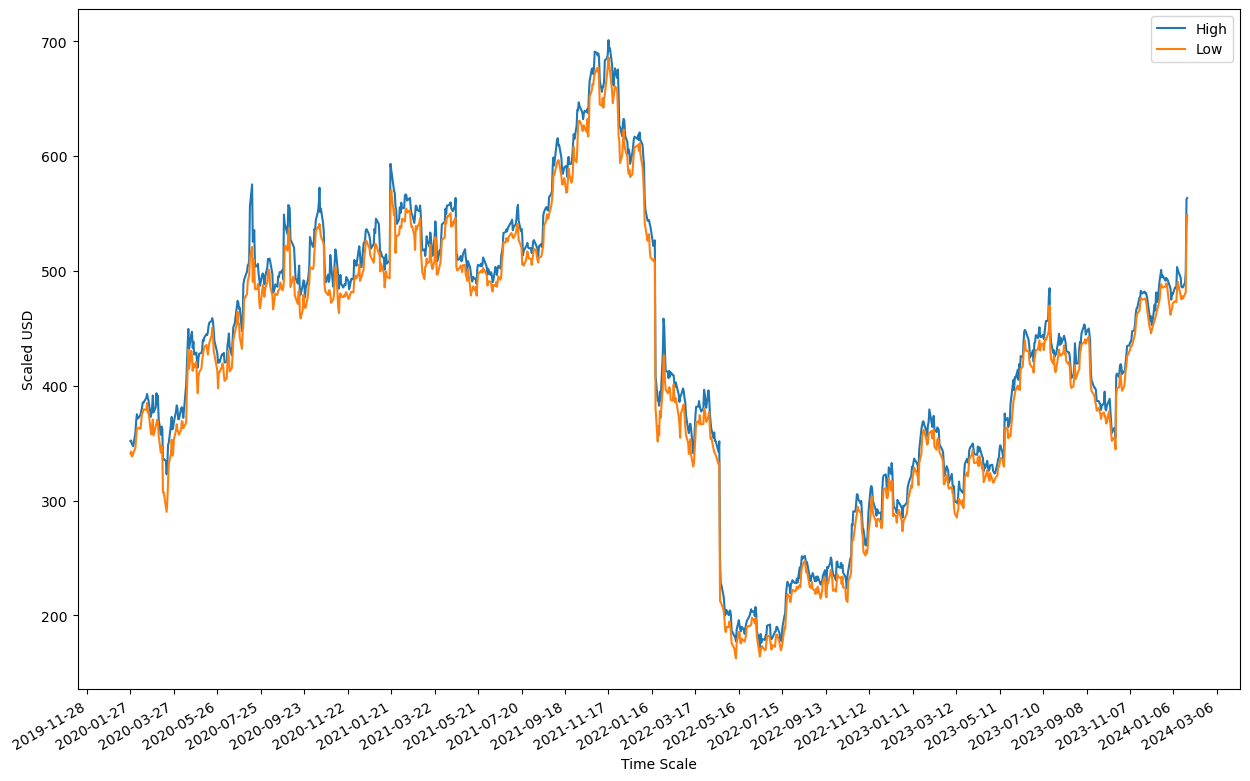

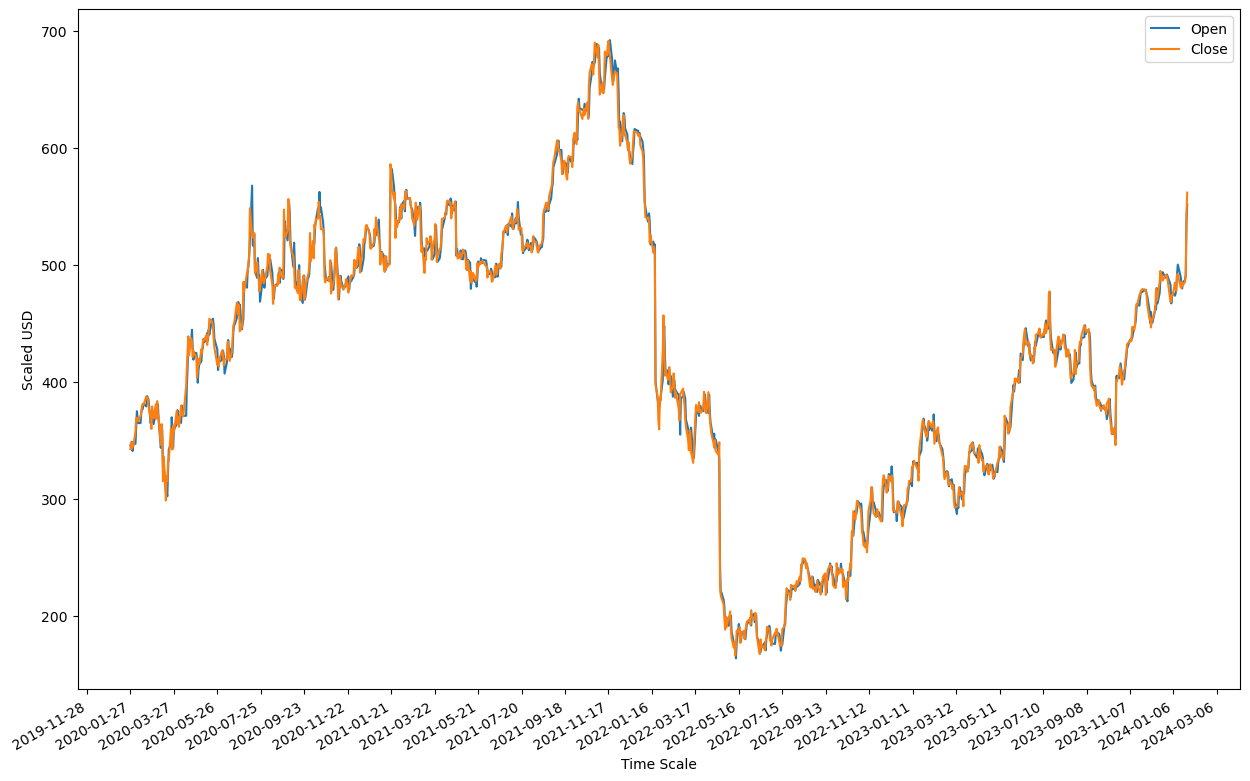

In [73]:
# plot graph
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

plt.figure(figsize=(15,10))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['Open'], label='Open')
plt.plot(x_dates, stock_data['Close'], label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [74]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [75]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]

In [76]:
# feature scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
                   data=X_ft,
                   index=X_feat.index)
X_ft

,Open,High,Low
Date,,,
2020-01-27,-0.634257,-0.636925,-0.625200
2020-01-28,-0.634836,-0.632807,-0.610525
2020-01-29,-0.609034,-0.657514,-0.645795
2020-01-30,-0.674365,-0.667397,-0.639958
2020-01-31,-0.622348,-0.674067,-0.625533
...,...,...,...
2024-01-19,0.515473,0.464764,0.500748
2024-01-22,0.536726,0.498777,0.532765
2024-01-23,0.573526,0.574216,0.545272


In [77]:
def lstm_split(data, n_steps):
    X, y = [],[]
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i+n_steps, :-1])
#         print('xis',X)
        y.append(data[i+n_steps-1,-1])
#         print('yis',y)
    return np.array(X), np.array(y)            

In [78]:
X1, y1 = lstm_split(stock_data.values, n_steps=2)
                    
train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
print(split_idx)
date_index=stock_data.index
print(len(date_index))

                    
X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
x_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_test.shape)      
X_train.shape
                    

805
1007
(1006, 2, 5) (805, 2, 5) (201, 2, 5) (201,)


(805, 2, 5)

In [79]:
# build sequential lstm module provided Tensorflow keras
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 32)             4864      
                                                                 
 dense_2 (Dense)             (None, 2, 1)              33        
                                                                 
Total params: 4897 (19.13 KB)
Trainable params: 4897 (19.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
history = lstm.fit(X_train, y_train,
                  epochs=100, batch_size=4,
                  verbose=2, shuffle=False)

Epoch 1/100
202/202 - 0s - loss: 105598540578816.0000 - 379ms/epoch - 2ms/step
Epoch 2/100
202/202 - 0s - loss: 105329853464576.0000 - 87ms/epoch - 431us/step
Epoch 3/100
202/202 - 0s - loss: 104412290744320.0000 - 84ms/epoch - 414us/step
Epoch 4/100
202/202 - 0s - loss: 102730492280832.0000 - 85ms/epoch - 419us/step
Epoch 5/100
202/202 - 0s - loss: 100225477771264.0000 - 84ms/epoch - 417us/step
Epoch 6/100
202/202 - 0s - loss: 97127002800128.0000 - 86ms/epoch - 424us/step
Epoch 7/100
202/202 - 0s - loss: 93936815177728.0000 - 85ms/epoch - 419us/step
Epoch 8/100
202/202 - 0s - loss: 91123133448192.0000 - 84ms/epoch - 415us/step
Epoch 9/100
202/202 - 0s - loss: 89052011298816.0000 - 85ms/epoch - 419us/step
Epoch 10/100
202/202 - 0s - loss: 87725227114496.0000 - 84ms/epoch - 415us/step
Epoch 11/100
202/202 - 0s - loss: 86955958206464.0000 - 84ms/epoch - 418us/step
Epoch 12/100
202/202 - 0s - loss: 86536032878592.0000 - 85ms/epoch - 421us/step
Epoch 13/100
202/202 - 0s - loss: 86310488375

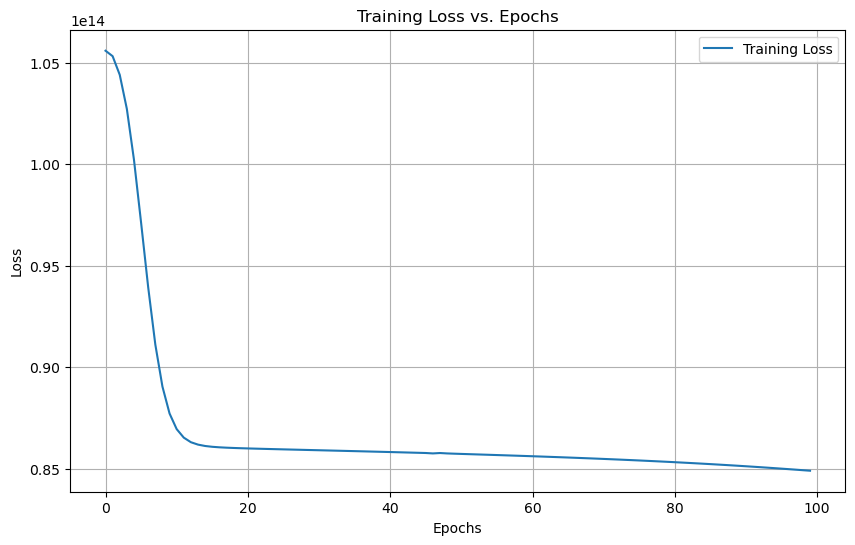

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()
plt.grid()
plt.show()


In [68]:
print(stock_data.index)

Index(['2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
       ...
       '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18',
       '2024-01-19', '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25'],
      dtype='object', name='Date', length=1007)


In [85]:
history.history['loss']

[105598540578816.0,
 105329853464576.0,
 104412290744320.0,
 102730492280832.0,
 100225477771264.0,
 97127002800128.0,
 93936815177728.0,
 91123133448192.0,
 89052011298816.0,
 87725227114496.0,
 86955958206464.0,
 86536032878592.0,
 86310488375296.0,
 86192141893632.0,
 86124596822016.0,
 86084985815040.0,
 86059434115072.0,
 86041281167360.0,
 86027129585664.0,
 86015167430656.0,
 86004505509888.0,
 85994590175232.0,
 85985094270976.0,
 85975933911040.0,
 85966974877696.0,
 85958133284864.0,
 85949400743936.0,
 85940735311872.0,
 85932036325376.0,
 85923396059136.0,
 85914755792896.0,
 85906065195008.0,
 85897391374336.0,
 85888642056192.0,
 85879892738048.0,
 85871051145216.0,
 85862201163776.0,
 85853267296256.0,
 85844257931264.0,
 85835181457408.0,
 85826037874688.0,
 85816785240064.0,
 85807473885184.0,
 85798045089792.0,
 85788540796928.0,
 85778944229376.0,
 85758526357504.0,
 85778055036928.0,
 85758257922048.0,
 85745532403712.0,
 85733897404416.0,
 85722665058304.0,
 857115